<a href="https://colab.research.google.com/github/satishjasthi/100-nlp-papers/blob/master/Copy_of_Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectives:**

???

**Imports**

In [1]:
import numpy as np
import keras
import seaborn as sns
from datetime import datetime
from datetime import datetime
from keras.models import Sequential
from collections import Counter
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from IPython.display import display, Markdown
from sklearn.utils.multiclass import unique_labels
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard,LearningRateScheduler

from keras.datasets import mnist

Using TensorFlow backend.


**Create train and test splits**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Visualize a single image**

(60000, 28, 28)


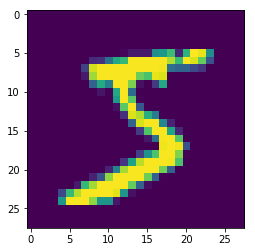

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshape image array into three dimensional matrix**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


**Convert Image data type to float and normalize all pixels(Pixel Normalization)**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Standardize the images using:**

$X_{standardized} = \frac{X - \mu}{\sigma}$

In [0]:
X_train_stand = np.empty_like(X_train)
X_test_stand = np.empty_like(X_test)

for index, image in enumerate(X_train):
  mu, std = image.mean(), image.std()
  X_train_stand[index, :, :, :] = (image - mu)/std
  
for index, image in enumerate(X_test):
  mu, std = image.mean(), image.std()
  X_test_stand[index, :, :, :] = (image - mu)/std


# ?? Visualize X_train and X_train_stand

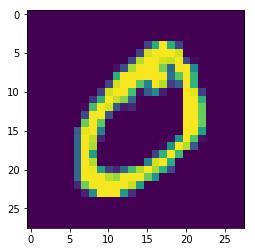

In [7]:
plt.imshow(X_train_stand[1].reshape((28,28)))

Non Standardized data


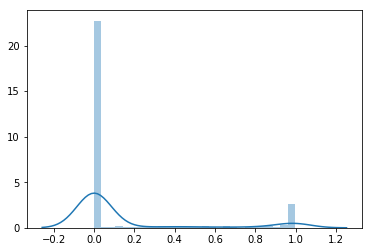

Standardized data


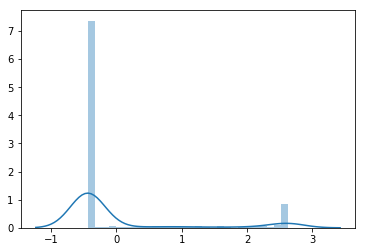

In [8]:
print('Non Standardized data')
sns.distplot(X_train[10].reshape((28*28)))
plt.show()

print('Standardized data')
sns.distplot(X_train_stand[10].reshape((28*28)))
plt.show()

**Convert 1-dimensional class arrays to 10-dimensional class matrices**


In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

**Why Learning rate scheduler ?**
    
As the model moves closer to global optima in loss function it should it take smaller steps so that it won't oscillate around minima position and settle at minima position, however, in all our previous models we were using a constant learning rate, instead if can reduce the lr as the model progress it might help model to settle at optimal position in loss function.


In [16]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3,  input_shape=(28,28,1), use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 5
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 3
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.01))) #1

model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., use_bias=False, kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        720       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 12)        1080      
__________

In [0]:
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
filepath="Fourth_weights/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
! mkdir Fourth_weights

mkdir: cannot create directory ‘Fourth_weights’: File exists


In [20]:
model_logs = model.fit(X_train_stand, Y_train,
                       batch_size=128, 
                       epochs=40,
                       verbose=1, 
                       validation_data=(X_test_stand, Y_test), 
                       callbacks=[checkpoint,LearningRateScheduler(scheduler, verbose=1)]
                      )

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 264us/step - loss: 0.6906 - acc: 0.9221 - val_loss: 0.9511 - val_acc: 0.7422

Epoch 00001: val_acc improved from -inf to 0.74220, saving model to Fourth_weights/weights-improvement-01-0.74.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 13s 211us/step - loss: 0.2101 - acc: 0.9766 - val_loss: 0.3239 - val_acc: 0.9413

Epoch 00002: val_acc improved from 0.74220 to 0.94130, saving model to Fourth_weights/weights-improvement-02-0.94.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 13s 213us/step - loss: 0.1649 - acc: 0.9798 - val_loss: 0.1639 - val_acc: 0.9790

Epoch 00003: val_acc improved

**Model reached a max validation accuracy of 99.26% at 37th epoch**

**Plot train and validation accuray**

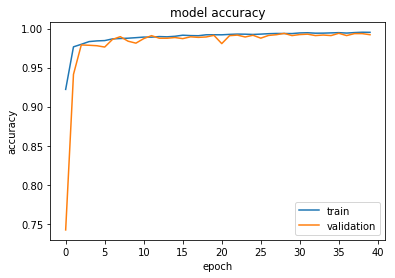

In [26]:
# summarize history for accuracy
plt.plot(model_logs.history['acc'])
plt.plot(model_logs.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


**Plot train and validation loss**

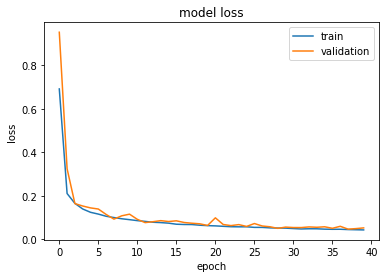

In [27]:
# summarize history for loss
plt.plot(model_logs.history['loss'])
plt.plot(model_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Reload best weights and test model**

Redifine model graph

In [28]:
model = Sequential()

 
model.add(Convolution2D(8, 3, 3,  input_shape=(28,28,1), use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 26
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))


model.add(Convolution2D(10, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 24
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 22
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(8, 1, 1, use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 11
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 9
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 7
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 5
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(12, 3, 3,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 3
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,  use_bias=False, kernel_regularizer=regularizers.l2(0.01))) # 3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, use_bias=False, kernel_regularizer=regularizers.l2(0.01))) #1

model.add(Flatten())

model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., use_bias=False, kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), use_bias=False, kernel_regularizer=<keras.reg...)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), use_bias=False, kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_20 (Batc (None, 26, 26, 8)         32        
_________________________________________________________________
activation_12 (Activation)   (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        720       
_________________________________________________________________
batch_normalization_21 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
activation_13 (Activation)   (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 12)        1080      
__________

**Load best model weights**

In [0]:
model.load_weights("Fourth_weights/weights-improvement-36-0.99.hdf5")

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

**Test model**

In [30]:
score = model.evaluate(X_test_stand, Y_test, verbose=0)
score

[0.050425318795442584, 0.9939]

**Other metrics to evaluate model performance**
- class wise confusion matrix
- Sensitivity/ Recall
- Precision

**Class wise confusion matrix**

In [0]:
# function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = [0,1]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

### Class: 7

Confusion matrix, without normalization
[[   0    0]
 [   8 1020]]


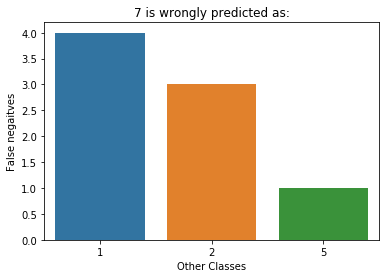

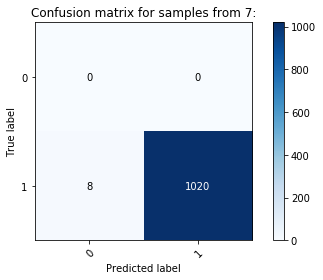

Sensitivity: 0.9922178988326849

Precision: 1.0

### Class: 2

Confusion matrix, without normalization
[[   0    0]
 [   4 1028]]


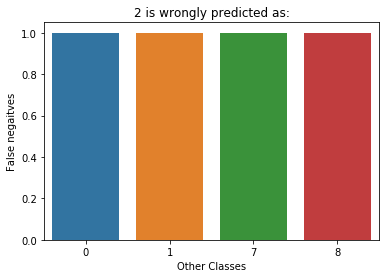

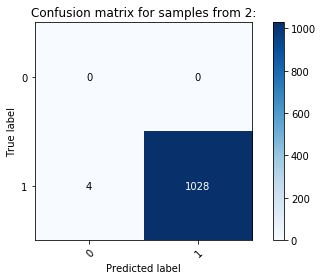

Sensitivity: 0.9961240310077519

Precision: 1.0

### Class: 1

Confusion matrix, without normalization
[[   0    0]
 [   1 1134]]


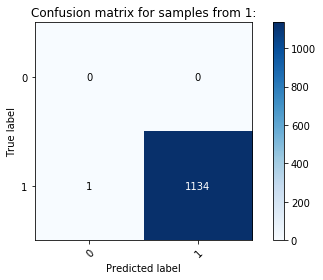

Sensitivity: 0.9991189427312775

Precision: 1.0

### Class: 0

Confusion matrix, without normalization
[[  0   0]
 [  4 976]]


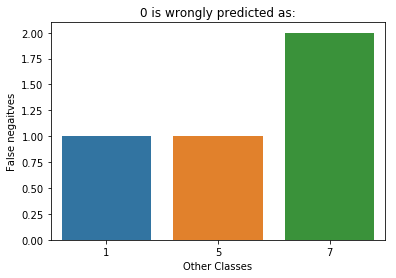

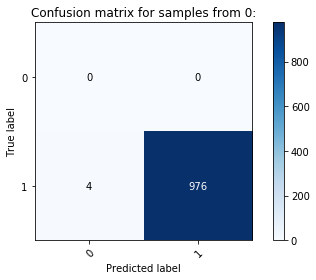

Sensitivity: 0.9959183673469387

Precision: 1.0

### Class: 4

Confusion matrix, without normalization
[[  0   0]
 [  5 977]]


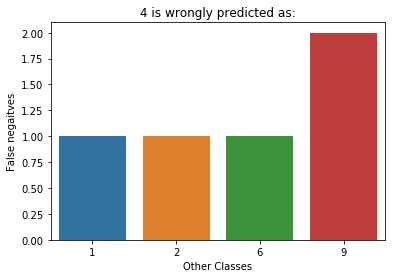

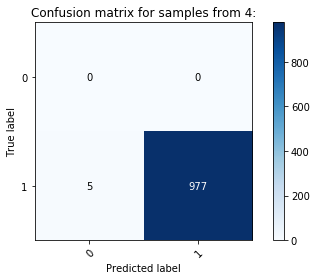

Sensitivity: 0.994908350305499

Precision: 1.0

### Class: 9

Confusion matrix, without normalization
[[  0   0]
 [ 13 996]]


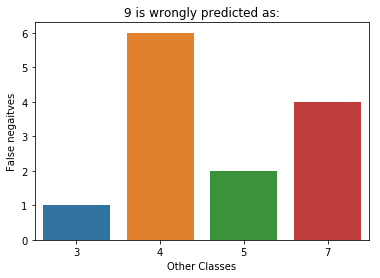

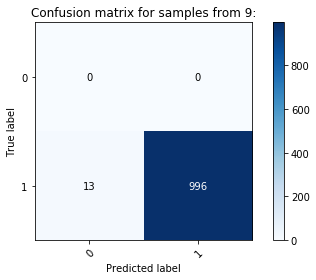

Sensitivity: 0.9871159563924677

Precision: 1.0

### Class: 5

Confusion matrix, without normalization
[[  0   0]
 [  4 888]]


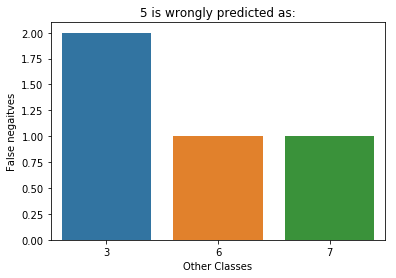

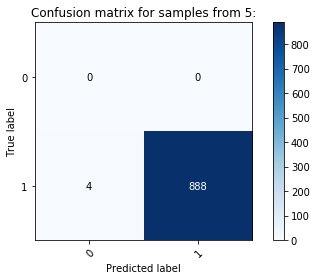

Sensitivity: 0.9955156950672646

Precision: 1.0

### Class: 6

Confusion matrix, without normalization
[[  0   0]
 [ 11 947]]


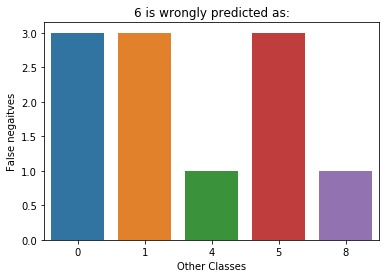

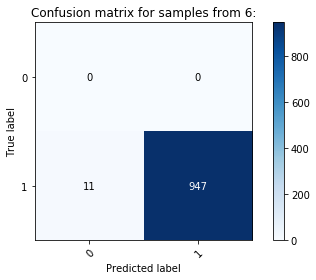

Sensitivity: 0.988517745302714

Precision: 1.0

### Class: 3

Confusion matrix, without normalization
[[   0    0]
 [   3 1007]]


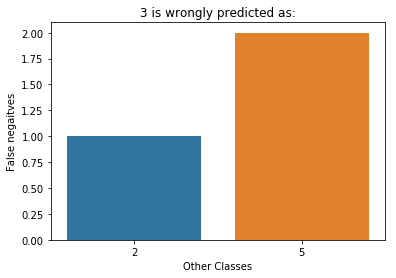

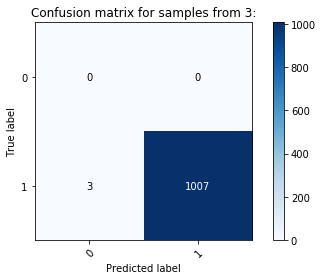

Sensitivity: 0.997029702970297

Precision: 1.0

### Class: 8

Confusion matrix, without normalization
[[  0   0]
 [  8 966]]


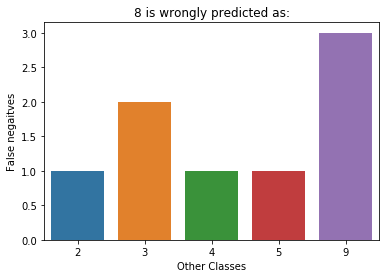

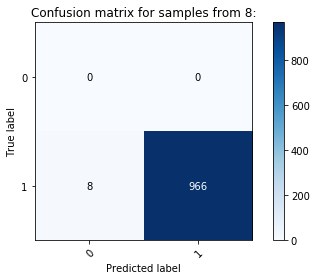

Sensitivity: 0.9917864476386037

Precision: 1.0

In [35]:
# create class wise data holder
class_wise_test_data = {}
for image, label in zip(X_test_stand, Y_test):
    class_wise_test_data.setdefault(np.argmax(label), []).append(image)

# confusion matircies holder
class_wise_cf_matrix = defaultdict(dict)
for label, features in class_wise_test_data.items():
    # convert list of arrays to np array
    features_array = np.array(features)
    
    # get model predicitons for a given class test data
    predictions_array = model.predict(features_array)
    
    # convert 10 dimensional prediction to single number
    predictions = []
    for prediciton_array in predictions_array:
        predictions.append(np.argmax(prediciton_array))
    
    # create true labels
    labels = [label]*len(predictions)
    
    # plot the frequencies of wrong predicitions for given class as other class
    freq_pred = Counter(predictions)
    del freq_pred[label]
    if len(freq_pred)>1:
        sns.barplot(x = list(freq_pred.keys()), y = list(freq_pred.values()))
        plt.xlabel('Other Classes')
        plt.ylabel('False negaitves')
        plt.title(f'{label} is wrongly predicted as:')

    
    
    # convert labels and predictions to 1/0 format
    predictions_binary = [1 if pred==label else 0 for pred in predictions]
    labels_binary = [1 if y_true==label else 0 for y_true in labels] 
    
    # get confusion matrix
    cf = confusion_matrix(labels_binary, predictions_binary, labels=[0,1])
    tn, fp, fn, tp = cf.ravel()

    print('\n')
    display(Markdown(f"### Class: {label}"))
    
    # save cf matix values class wise
    class_wise_cf_matrix[label] = {'tn':tn,
                                   'fp':fp,
                                   'fn':fn,
                                   'tp':tp,
                                   'cf':cf
                                  } 
    cf_plot = plot_confusion_matrix(y_true = labels_binary, y_pred = predictions_binary, classes = [0,1],
                          normalize=False,
                          title=f'Confusion matrix for samples from {label}:',
                          cmap=plt.cm.Blues)
    
    # caluclate sensitivity and specificity
    sensitivity = tp/(tp+fn)
    precision = tp/(tp+fp)
    display(Markdown(f'Sensitivity: {sensitivity}'))
    display(Markdown(f'Precision: {precision}'))


Clearly most of the missclassified predictions are intutive to understand from the frequency plots.

**Plot false negatives for each class**

Text(0.5, 1.0, 'Class wise False negative count')

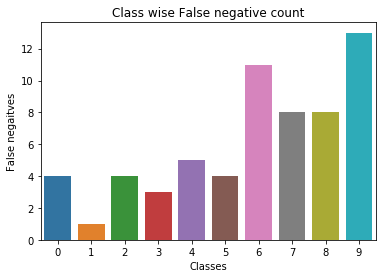

In [36]:
class_wise_fn = {}
for label, metrics in class_wise_cf_matrix.items():
    class_wise_fn[label] = metrics['fn']
sns.barplot(x = list(class_wise_fn.keys()), y = list(class_wise_fn.values()))
plt.xlabel('Classes')
plt.ylabel('False negaitves')
plt.title('Class wise False negative count')


**Visualize a layer**

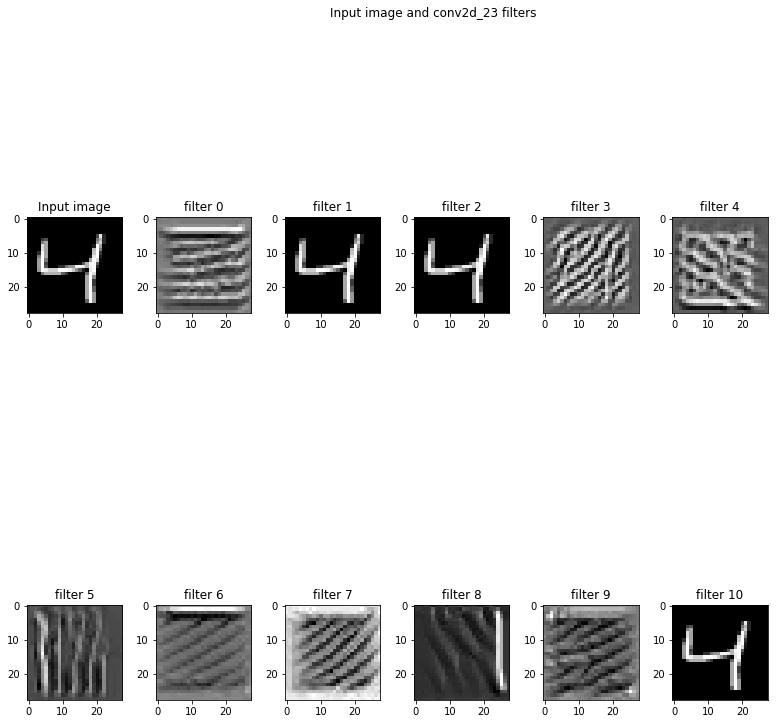

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline

layer_dict = dict([(layer.name, layer) for layer in model.layers])
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_23'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(2000):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 2, 3
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()